<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [6]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [9]:
# Read CSV
house_csv = "C:/Yan/Labs/DATA/Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [10]:
df.shape

(985, 12)

In [11]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [12]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [13]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Length: 985, dtype: bool

In [16]:
# Zip is categorical value, should be string
df['zip'] = df['zip'].astype(str)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [18]:
df['sq__ft'] = df['sq__ft'].replace(0, np.nan)

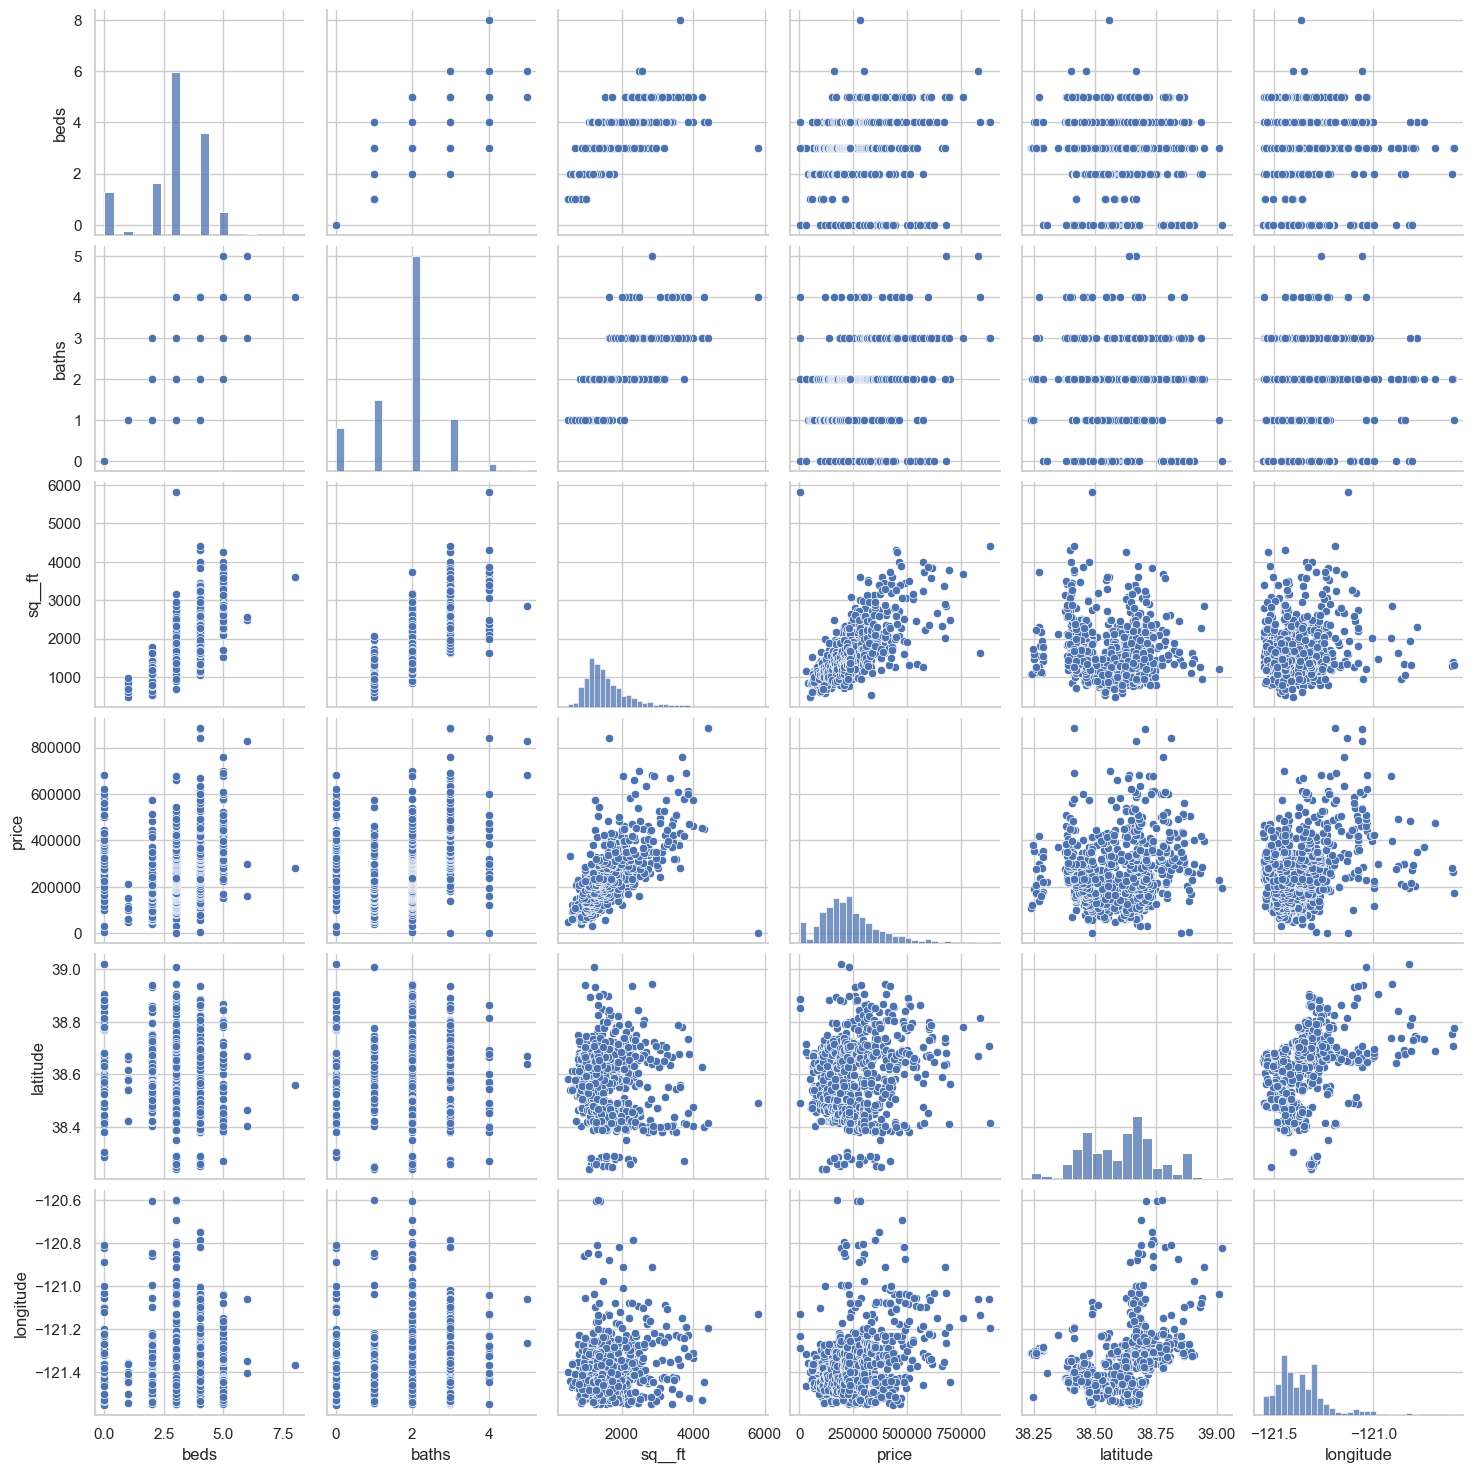

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df[df['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,NaN,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,NaN,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


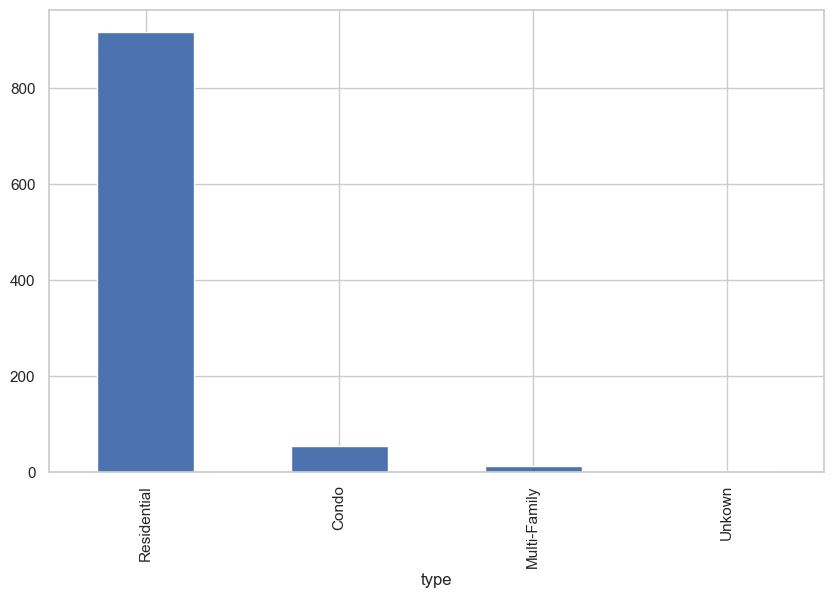

In [21]:
# Types
df['type'].value_counts().plot(kind='bar')
plt.show()

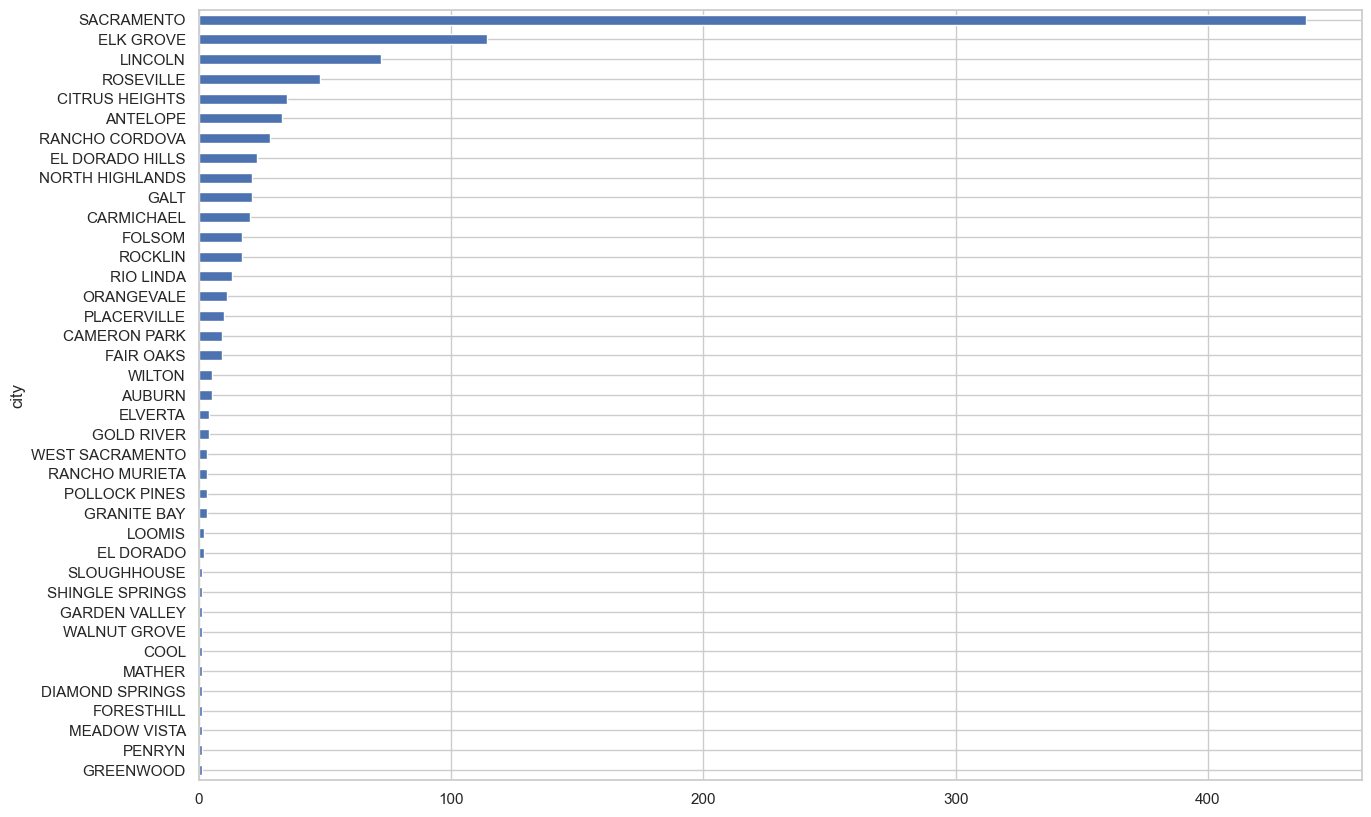

In [22]:
# City
df['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10))
plt.show()

In [23]:
# Create another type which have 0 beds, baths, sqft
df.loc[df['beds'] == 0, 'type'] = 'Plot'
df[df['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


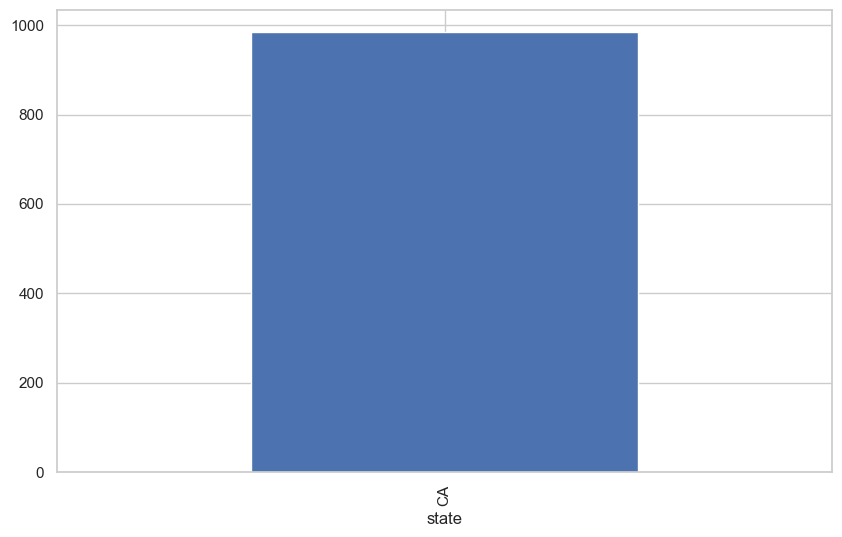

In [24]:
df['state'].value_counts().plot(kind='bar')
plt.show()

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [28]:
# ANSWER
## Price is the target variable. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

In [30]:
# ANSWER

## beds
## baths
## sqft
## Type

In [31]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    
    # create a figure
    fig = plt.figure(figsize=(15, 7))
    # get the axis of that figure
    ax = plt.gca()
    
    # plot a scatter plot on it with data
    ax.scatter(X, Y, c='b')

    plt.show()    

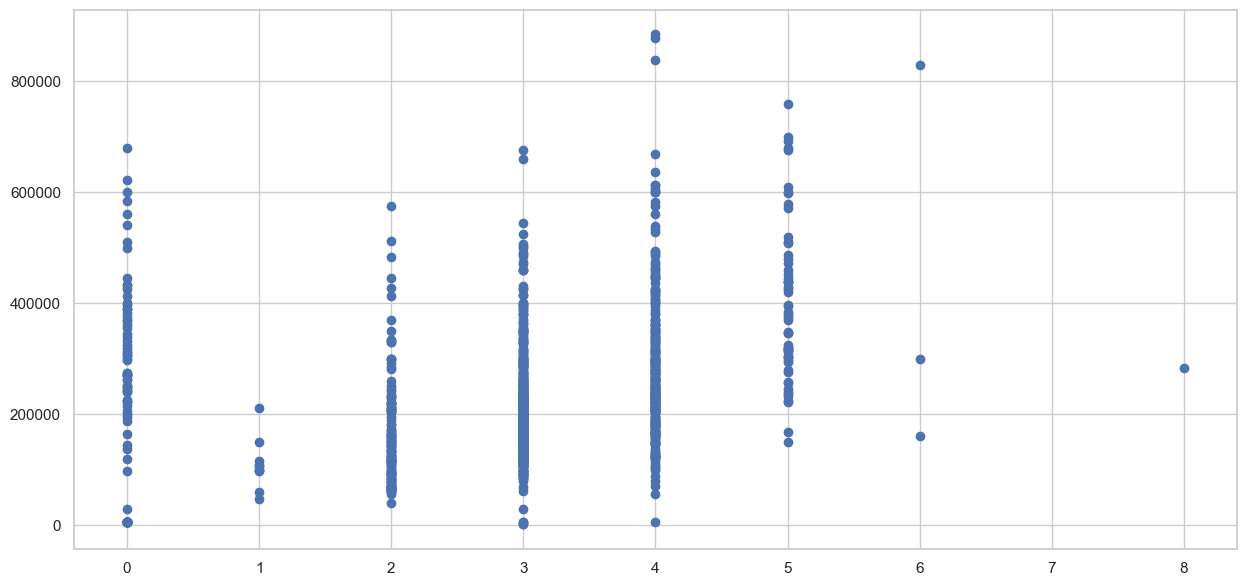

In [32]:
# beds
draw_scatter_plot(df['beds'], df['price'])

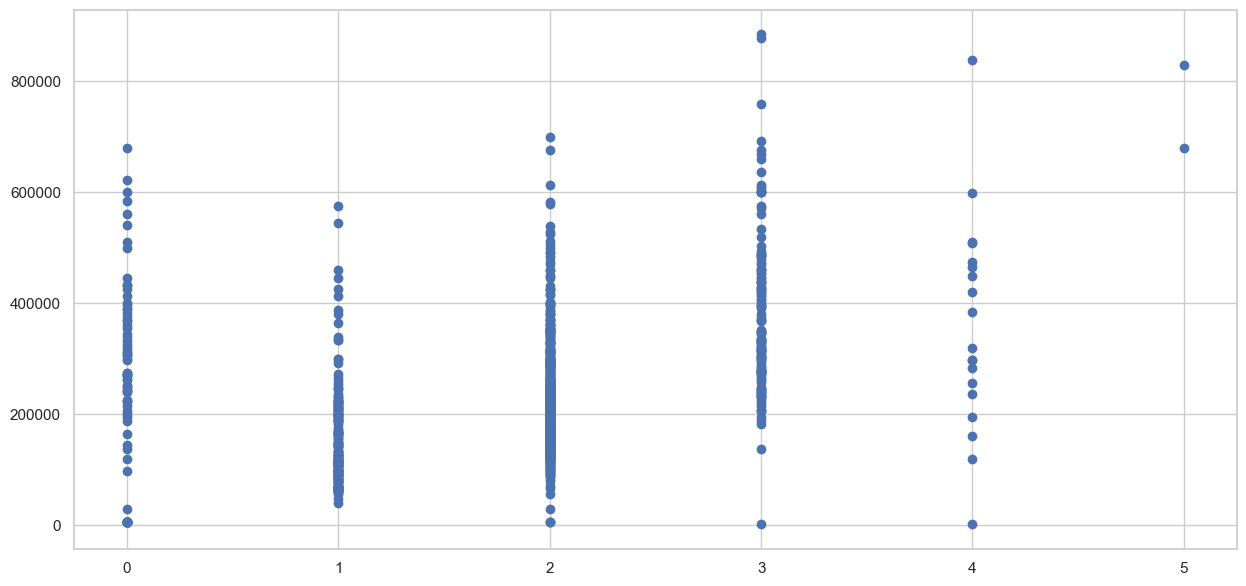

In [33]:
# baths
draw_scatter_plot(df['baths'], df['price'])

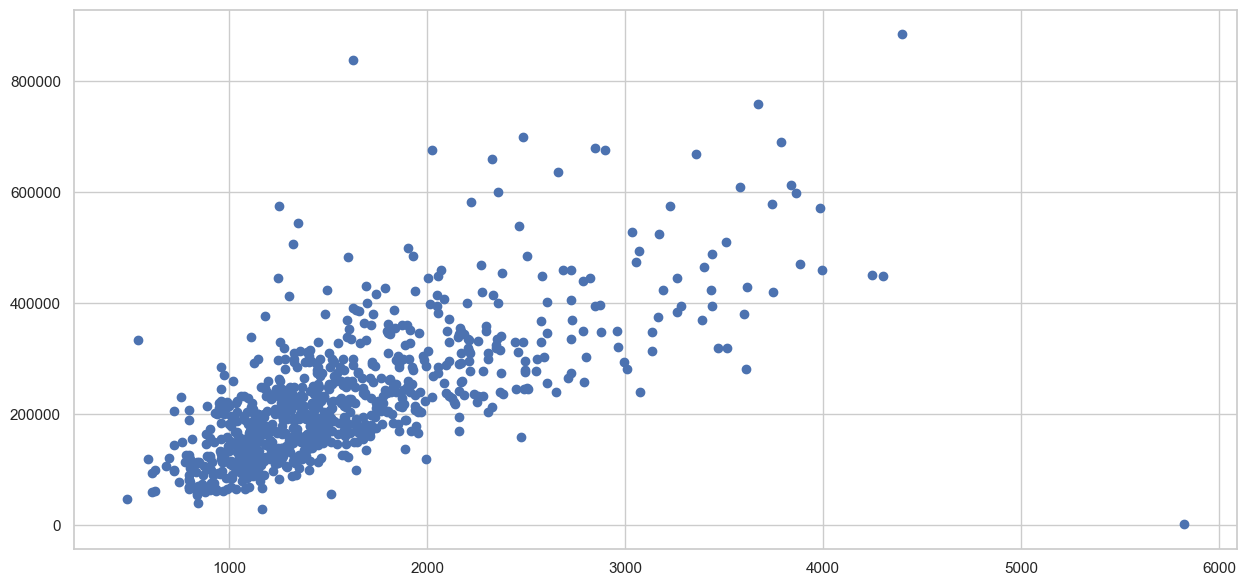

In [34]:
# sqft
draw_scatter_plot(df['sq__ft'], df['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [36]:
# ANSWER
df.corr(numeric_only=True)

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.695710,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.724631,0.416208,-0.235792,0.016582
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.342024,0.416208,0.693708,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.103287,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,0.135809,0.284485,0.387925,1.000000


In [37]:
### sq__ft is the best predictor.
### sq__ft is continuous and has moderate relationship with beds, baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [39]:
# ANSWER
### Mean of Price for each type
df['y_mean_byType'] = df.groupby('type')['price'].transform('mean')
df[['type', 'y_mean_byType']].drop_duplicates()

,type,y_mean_byType
0,Residential,245800.154034
5,Condo,138900.826087
56,Multi-Family,224534.692308
73,Plot,187585.046296


In [40]:
# Mean of Price
df['y_mean'] = df['price'].mean()
df[['type', 'y_mean']].drop_duplicates()

,type,y_mean
0,Residential,234144.263959
5,Condo,234144.263959
56,Multi-Family,234144.263959
73,Plot,234144.263959


In [41]:
X = df['sq__ft']
Y = df['price']
Ymean = df['y_mean']

In [42]:
def draw_plot(X, Y, Ymean):
    ### Plot the data

    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Ymean, color='r')

    plt.show();

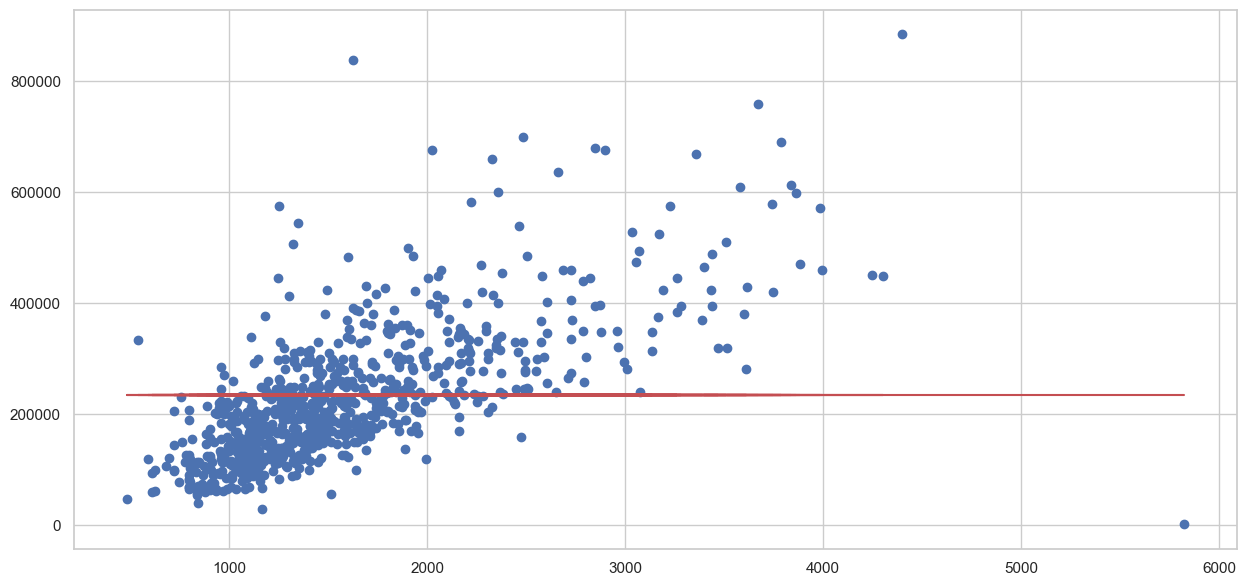

In [43]:
draw_plot(X, Y, Ymean)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [45]:
# ANSWER
res = abs(df['price'] - df['y_mean'])
res

0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [48]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [50]:
# ANSWER
def caculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))

    beta_1 = n / d

    return beta_1

In [51]:
beta_1 = caculate_beta_1(X, Y)
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [54]:
# ANSWER
def caluculte_beta_0(X, Y):

    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - caculate_beta_1(X, Y) * Xbar

    return beta_0

In [55]:
beta_0 = caluculte_beta_0(X, Y)
beta_0

34906.52804744002

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [58]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [59]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      139587.510912
1      181034.168003
2      134578.851445
3      141590.974699
4      134704.067931
           ...      
980    320400.117677
981    219851.278874
982    187169.775850
983    245896.308103
984    205451.382905
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [62]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [63]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       80365.510912
1      112822.168003
2       65698.851445
3       72283.974699
4       52804.067931
           ...      
980     87975.117677
981     14148.721126
982     47830.224150
983     10595.308103
984     30286.617095
Length: 985, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [66]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [67]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [68]:
def calculate_r_square(Y, Yhat):
    
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)  
    Rsquare = 1 - SSres / SStot
    return Rsquare

In [69]:
Rsquare = calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))
print(Rsquare)

0.6775989904536325


##### 2.7.F [BONUS] Draw Plot of Predicted Line

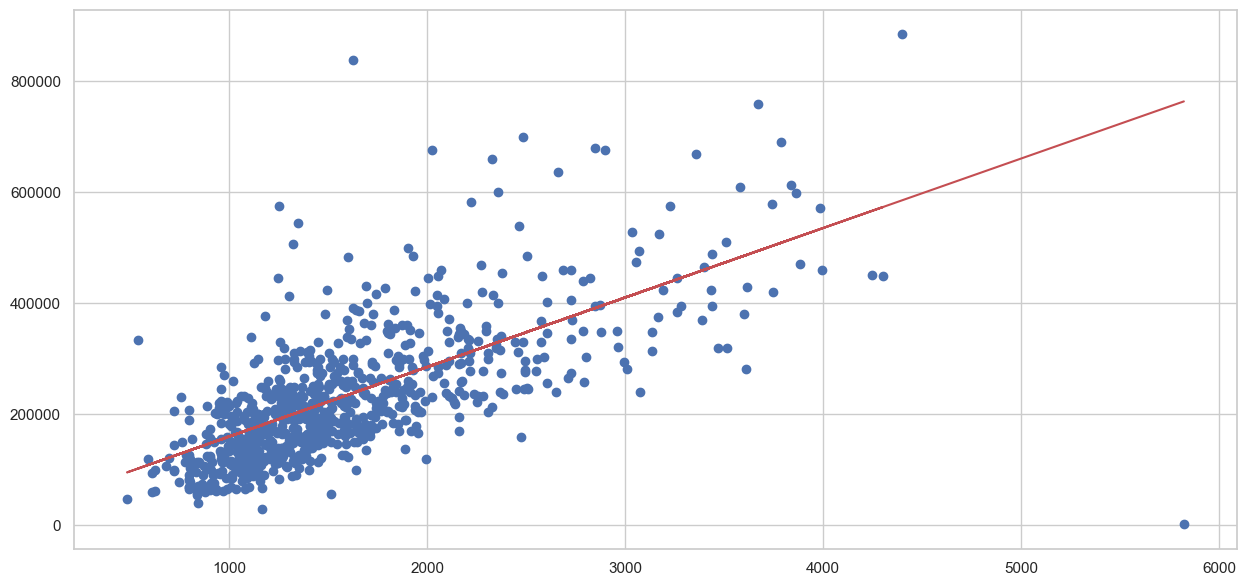

In [71]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

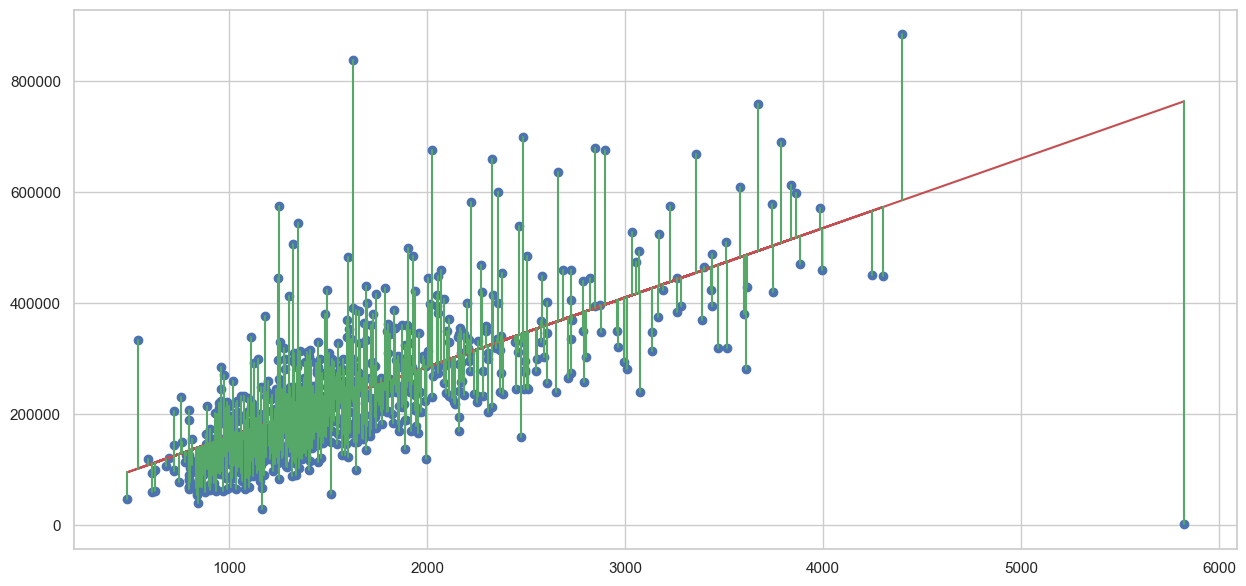

In [73]:
# ANSWER
df['Yhat'] = Yhat

# create a figure
fig = plt.figure(figsize=(15, 7))

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r')

# iterate over predications
for _, row in df.iterrows():
    ax.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [75]:
# ANSWER
xpred = 1204
xpred
beta_0
beta_1
Ypred = beta_0 + beta_1 * xpred
Ypred

185667.17800997294



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



